In [1]:
import numpy as np 
import pandas as pd 
import os
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import random

C:\Users\lrodr\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\lrodr\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\lrodr\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Deteccion de objetos

In [2]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.applications import InceptionV3


# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Input, GlobalAveragePooling2D
from keras import backend as K
from keras import applications
from keras.utils import plot_model


import keras_tuner as kt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from tqdm.auto import tqdm
import shutil as sh

import matplotlib.pyplot as plt
from IPython.display import Image, clear_output
%matplotlib inline

import os
import shutil
from xml.etree import ElementTree as ET
import cv2
import xml.etree.ElementTree as ET
from PIL import Image
import glob

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.12.0


In [3]:
curr_path = os.getcwd()
img_train_path = os.path.join(curr_path,'images','train')
img_val_path = os.path.join(curr_path,'images','val')
img_test_path = os.path.join(curr_path,'images','test')

label_train_path = os.path.join(curr_path,'labels','train')
label_val_path = os.path.join(curr_path,'labels','val')
label_test_path = os.path.join(curr_path,'labels','test')

In [12]:
curr_path

'C:\\Users\\lrodr\\OneDrive - Universidad de los Andes\\laura\\2023-2\\deepLearning\\proyecto\\proyecto'

In [13]:
curr_path = os.getcwd()
# label_path = os.path.join(curr_path, 'labs')
data_path = ''
img_path = curr_path+'/images'
label_path = curr_path+'/labels'
# os.makedirs(label_path)

In [14]:
faceList = os.listdir(img_path)
faceList[:5]

['test', 'train', 'val']

In [16]:
dataSize = len(faceList)
dataSize

3

In [95]:
random.shuffle(faceList)
faceList[:5]

['Tlight (67).png',
 'Stair (1525).png',
 'Cross (97).png',
 'Stair (1497).png',
 'Palm (59).png']

In [17]:
trainSplit = 0.7
valSplit = 0.1
testSplit = 0.2

imgTrainList = faceList[:int(dataSize*trainSplit)]
imgValList = faceList[int(dataSize*trainSplit):int(dataSize*(trainSplit+valSplit))]
imgTestList = faceList[int(dataSize*(trainSplit+valSplit)):]
len(imgTrainList), len(imgValList), len(imgTestList)

(2, 0, 1)

In [24]:
imgTrainList = os.listdir(img_train_path)
imgValList = os.listdir(img_val_path)
imgTestList = os.listdir(img_test_path)
len(imgTrainList), len(imgValList), len(imgTestList)

(1573, 324, 624)

In [125]:
# function to move files from source to detination
def move_files(data_list, source_path, destination_path):
    i=0
    for file in data_list:
        filepath=os.path.join(source_path, file)
        dest_path=os.path.join(data_path, destination_path)
        if not os.path.isdir(dest_path):
            os.makedirs(dest_path)
        shutil.move(filepath, dest_path)
        i=i+1
    print("Number of files transferred:", i)

In [121]:
def move_images(data_list, source_path, destination_path):
    i=0
    
    for file in data_list:
        filepath=os.path.join(source_path, file)
        dest_path=os.path.join(data_path, destination_path)

        if not os.path.isdir(dest_path):
            os.makedirs(dest_path)
        finalimage_path=os.path.join(dest_path, file)
        img_resized=cv2.resize(cv2.imread(filepath), (def_size, def_size))
        cv2.imwrite(finalimage_path, img_resized)
        i=i+1
    print("Number of files transferred:", i)

In [25]:
def_size = 300
space = ' '
new_line = '\n'
text = '.txt'
class_id = 0

def change_extension(file):
    basename=os.path.splitext(file)[0]
    filename=basename+text
    return filename

labelTrainList = list(map(change_extension, imgTrainList))
labelValList = list(map(change_extension, imgValList))
labelTestList = list(map(change_extension, imgTestList))
len(labelTrainList), len(labelValList), len(labelTestList)

(1573, 324, 624)

In [101]:
move_images(imgTrainList, img_path, img_train_path)

Number of files transferred: 1207


In [102]:
move_images(imgValList, img_path, img_val_path)

Number of files transferred: 172


In [103]:
move_images(imgTestList, img_path, img_test_path)

Number of files transferred: 346


In [107]:
# labelTrainList

In [127]:
move_files(labelTrainList, label_path, label_train_path)

In [128]:
move_files(labelValList, label_path, label_val_path)

Number of files transferred: 172


In [129]:
move_files(labelTestList, label_path, label_test_path)

Number of files transferred: 346


In [133]:
len(imgTrainList),len(labelTrainList)

(1207, 1207)

In [131]:
len(imgTestList),len(labelTestList)

(346, 346)

In [132]:
len(imgValList),len(labelValList)

(172, 172)

In [19]:
def_size = 300
space = ' '
new_line = '\n'
text = '.txt'
class_id = 0

In [21]:
ln_1='# Train/val/test sets'+new_line
ln_2='train: ' +"'"+img_train_path+"'"+new_line
ln_3='val: ' +"'" + img_val_path+"'"+new_line
ln_4='test: ' +"'" + img_test_path+"'"+new_line
ln_5=new_line
ln_6='# Classes'+new_line
# ln_7='names:'+new_line
# ln_8='  0: object'
ln_7='nc:'+str(6)
ln_8="  names: ['Bicycle', 'Chimney', 'Cross', 'Palm', 'Stair', 'Tlight']"
config_lines=[ln_1, ln_2, ln_3, ln_4, ln_5, ln_6, ln_7, ln_8]

In [22]:
# Creating path for config file
config_path=os.path.join(curr_path, 'config.yaml')
config_path

'C:\\Users\\lrodr\\OneDrive - Universidad de los Andes\\laura\\2023-2\\deepLearning\\proyecto\\proyecto\\config.yaml'

In [23]:
# Writing config file
with open(config_path, 'w') as f:
    f.writelines(config_lines)

C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\images\train C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\labels\train
C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\labels\train\Tlight (292).txt
C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\images\train C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\labels\train
C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\labels\train\Tlight (508).txt
C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\images\train C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\labels\train
C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\labels\

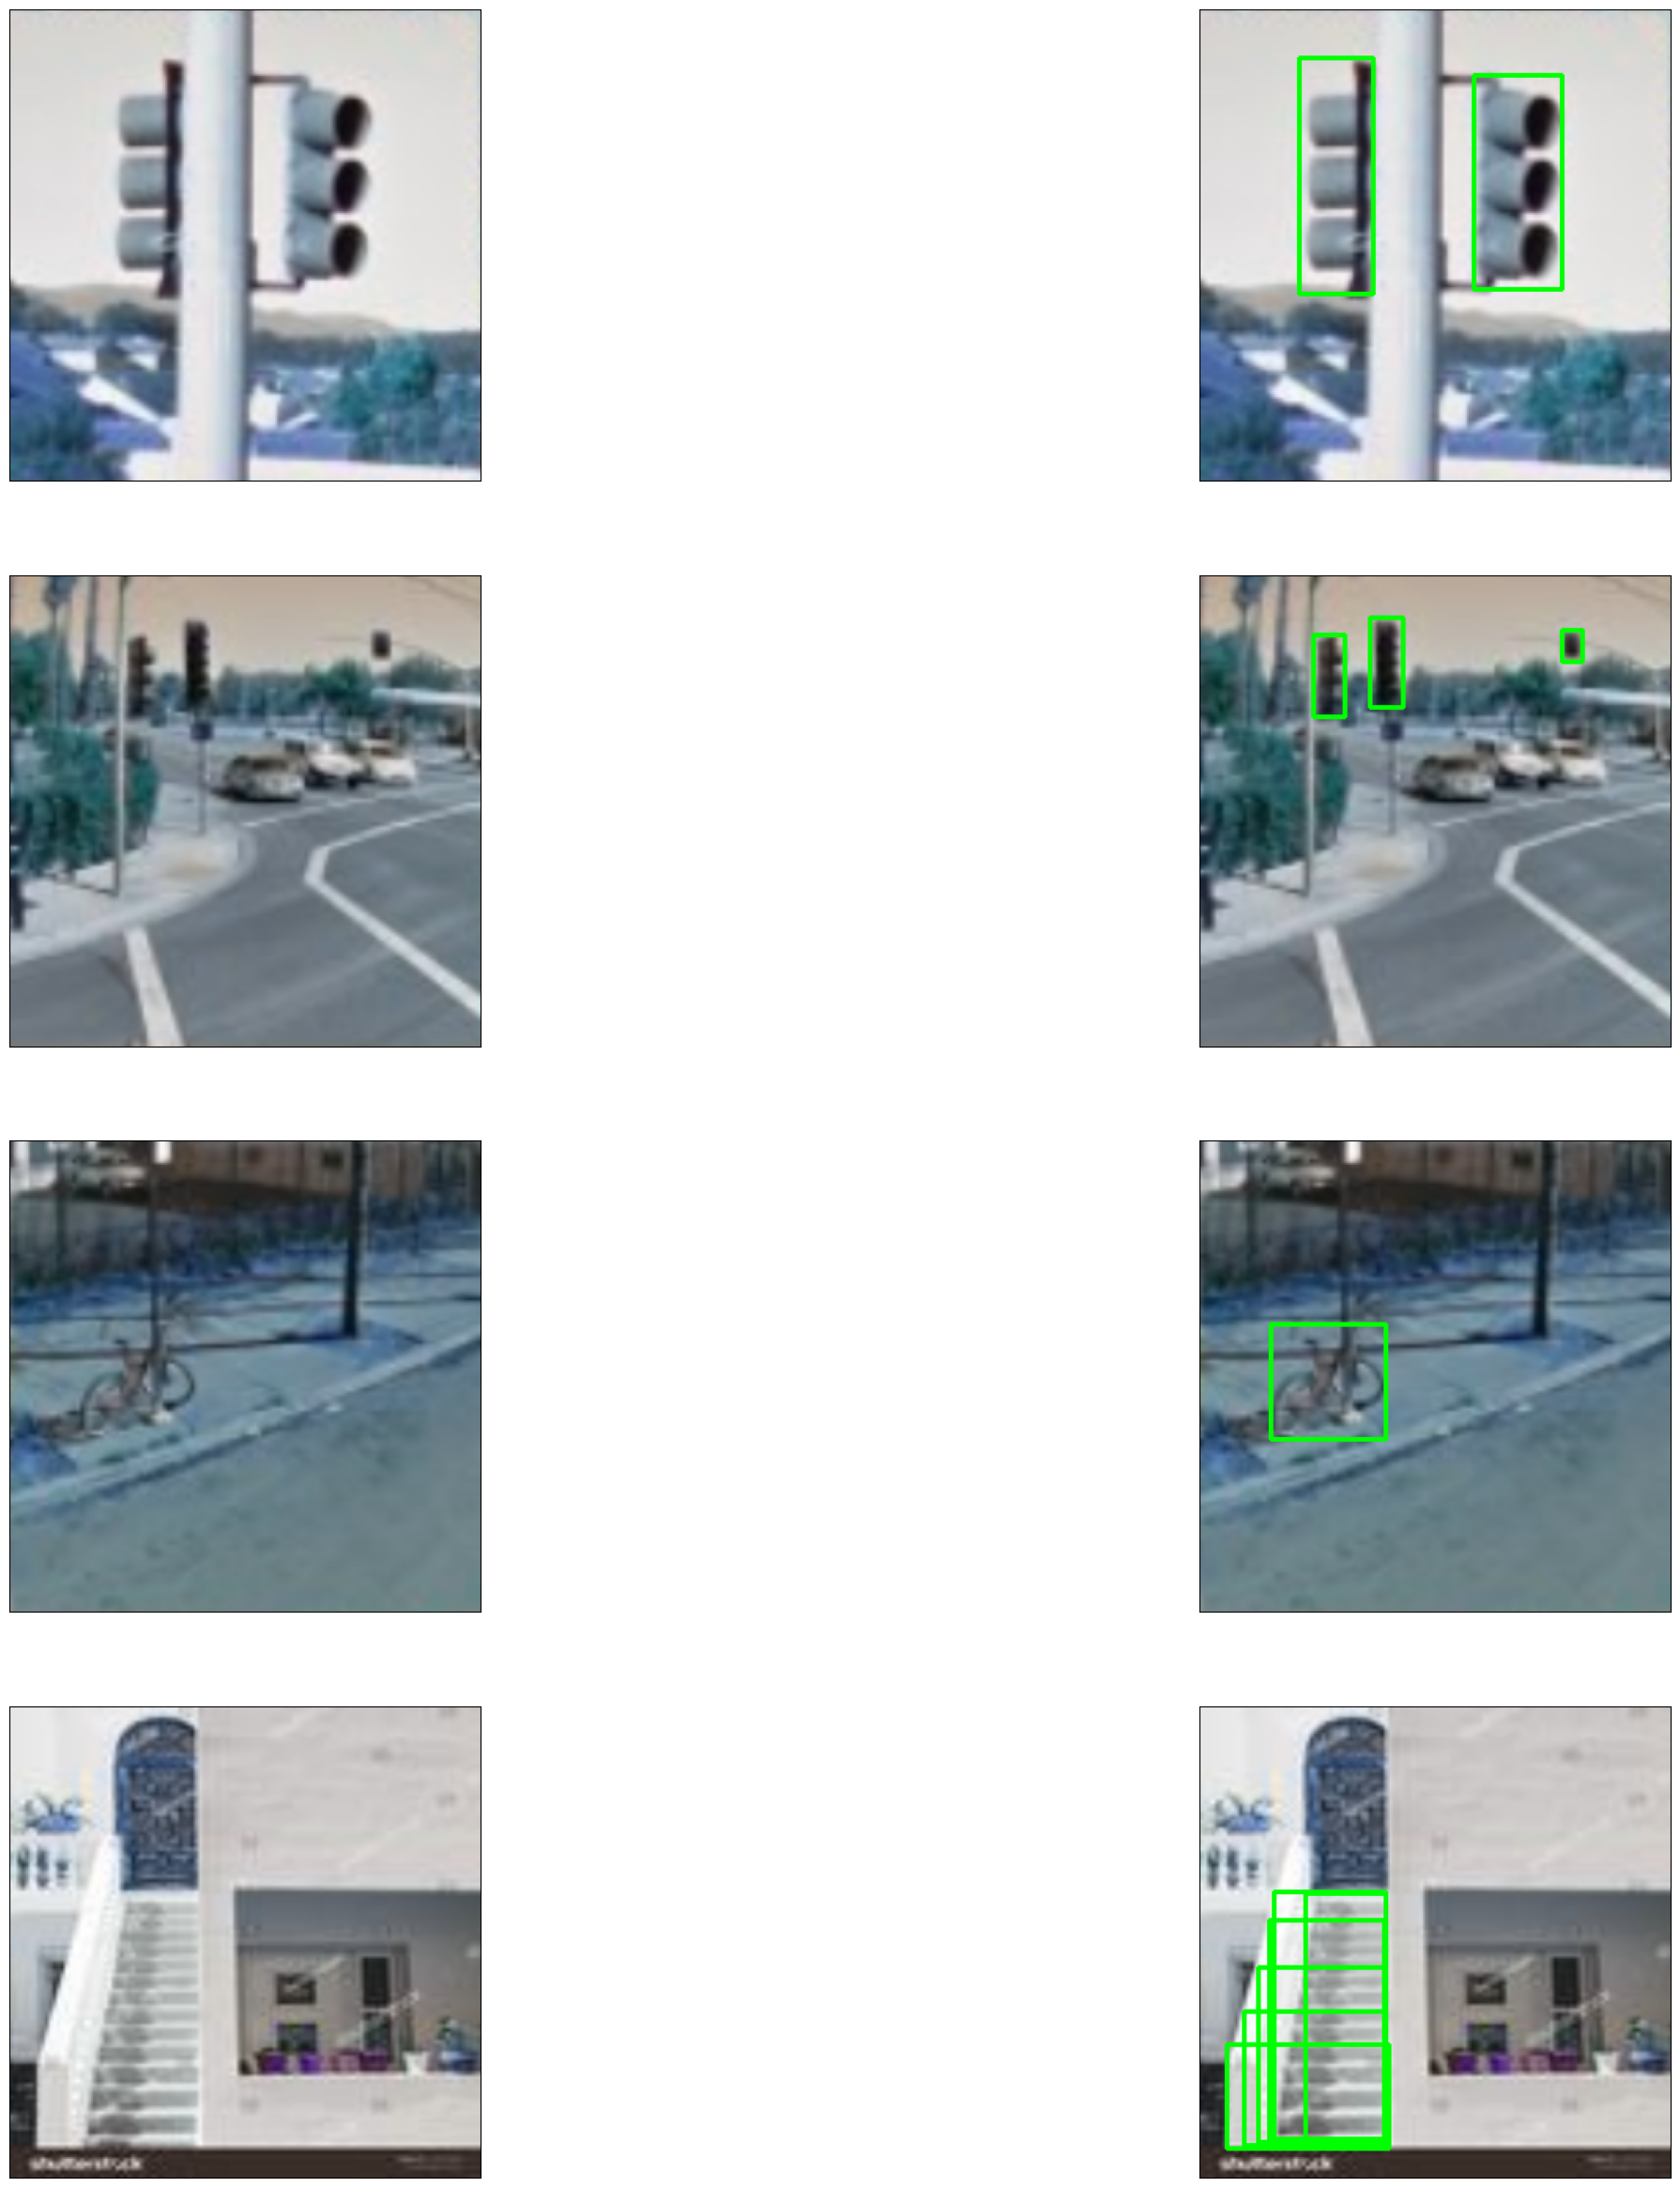

In [29]:
import copy
green = (0,255,0)
def get_bbox_from_label(text_file_path):
    bbox_list=[]
    print(text_file_path)
    with open(text_file_path, "r") as file:
        
        for line in file:
            _,x_centre,y_centre,width,height=line.strip().split(" ")
            x1=(float(x_centre)+(float(width)/2))*def_size
            x0=(float(x_centre)-(float(width)/2))*def_size
            y1=(float(y_centre)+(float(height)/2))*def_size
            y0=(float(y_centre)-(float(height)/2))*def_size

            vertices=np.array([[int(x0), int(y0)], [int(x1), int(y0)],
                               [int(x1),int(y1)], [int(x0),int(y1)]])
#             vertices=vertices.reshape((-1,1,2))
            bbox_list.append(vertices)

    return tuple(bbox_list)

plt.figure(figsize=(30,30))
for i in range(1,8,2):
    k = random.randint(0, len(imgTrainList)-1)
    img_path = os.path.join(img_train_path, imgTrainList[k])
    label_path = os.path.join(label_train_path, labelTrainList[k])
    print(img_train_path,label_train_path)
    bbox = get_bbox_from_label(label_path)
    img = cv2.imread(img_path)
    copy_img = copy.deepcopy(img)
    ax=plt.subplot(4, 2, i)
    plt.imshow(img) # displaying image
    plt.xticks([])
    plt.yticks([])
    cv2.drawContours(copy_img, bbox, -1, green, 2)
    ax=plt.subplot(4, 2, i+1)
    plt.imshow(copy_img) # displaying image with bounding box
    plt.xticks([])
    plt.yticks([])

In [30]:
# Installing ultralytics
!pip install ultralytics

In [31]:
from ultralytics import YOLO

In [32]:
# Using YOLO's ptetrained model architecture and weights for training
model=YOLO('yolov8n.yaml').load('yolov8n.pt')


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|█████████████████████████████████████████████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 9.54MB/s]


Transferred 355/355 items from pretrained weights


In [33]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [63]:
# Training the model
results=model.train(data=config_path, epochs=10, resume=True, iou=0.5, conf=0.001)

New https://pypi.org/project/ultralytics/8.0.222 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.219 🚀 Python-3.9.17 torch-2.0.1 CPU (AMD Ryzen 9 5900HS with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\config.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train25, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=None, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False,

train: Scanning C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\labels\t
val: Scanning C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\labels\val

Plotting labels to runs\detect\train25\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train25
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.351       2.83      2.287          3        640: 100%|██████████| 99/99 [08:12<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:45

                   all        324        314      0.366      0.507      0.319      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.841      2.286      1.873          8        640: 100%|██████████| 99/99 [08:34<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:42

                   all        324        314      0.352       0.58      0.315      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.777      2.171      1.812          5        640: 100%|██████████| 99/99 [07:42<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:38

                   all        324        314       0.39      0.594      0.354      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.709      2.088      1.772          3        640: 100%|██████████| 99/99 [07:37<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:38

                   all        324        314      0.375      0.608      0.348      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.658      1.994      1.736          4        640: 100%|██████████| 99/99 [07:36<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:39

                   all        324        314      0.365      0.558      0.328      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.581      1.898      1.671          3        640: 100%|██████████| 99/99 [07:36<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:39

                   all        324        314      0.389      0.607      0.365      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.544      1.835      1.659         12        640: 100%|██████████| 99/99 [07:34<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:38

                   all        324        314      0.429      0.655       0.38      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G        1.5      1.715       1.61          4        640: 100%|██████████| 99/99 [07:35<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:38

                   all        324        314      0.423      0.594      0.375      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.453      1.677      1.584          6        640: 100%|██████████| 99/99 [07:36<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:38

                   all        324        314      0.391      0.622      0.375      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.438      1.611      1.557          8        640: 100%|██████████| 99/99 [07:41<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:39

                   all        324        314      0.432      0.683      0.392      0.211



10 epochs completed in 1.411 hours.
Optimizer stripped from runs\detect\train25\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train25\weights\best.pt, 6.2MB

Validating runs\detect\train25\weights\best.pt...
Ultralytics YOLOv8.0.219 🚀 Python-3.9.17 torch-2.0.1 CPU (AMD Ryzen 9 5900HS with Radeon Graphics)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:33


                   all        324        314      0.431      0.683      0.392      0.212
               Bicycle        324         44      0.441      0.864       0.44      0.242
               Chimney        324         88      0.402      0.795      0.453      0.278
                 Cross        324        133      0.412      0.158      0.196     0.0865
                  Palm        324         49      0.468      0.916      0.478       0.24
Speed: 1.9ms preprocess, 94.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\train25


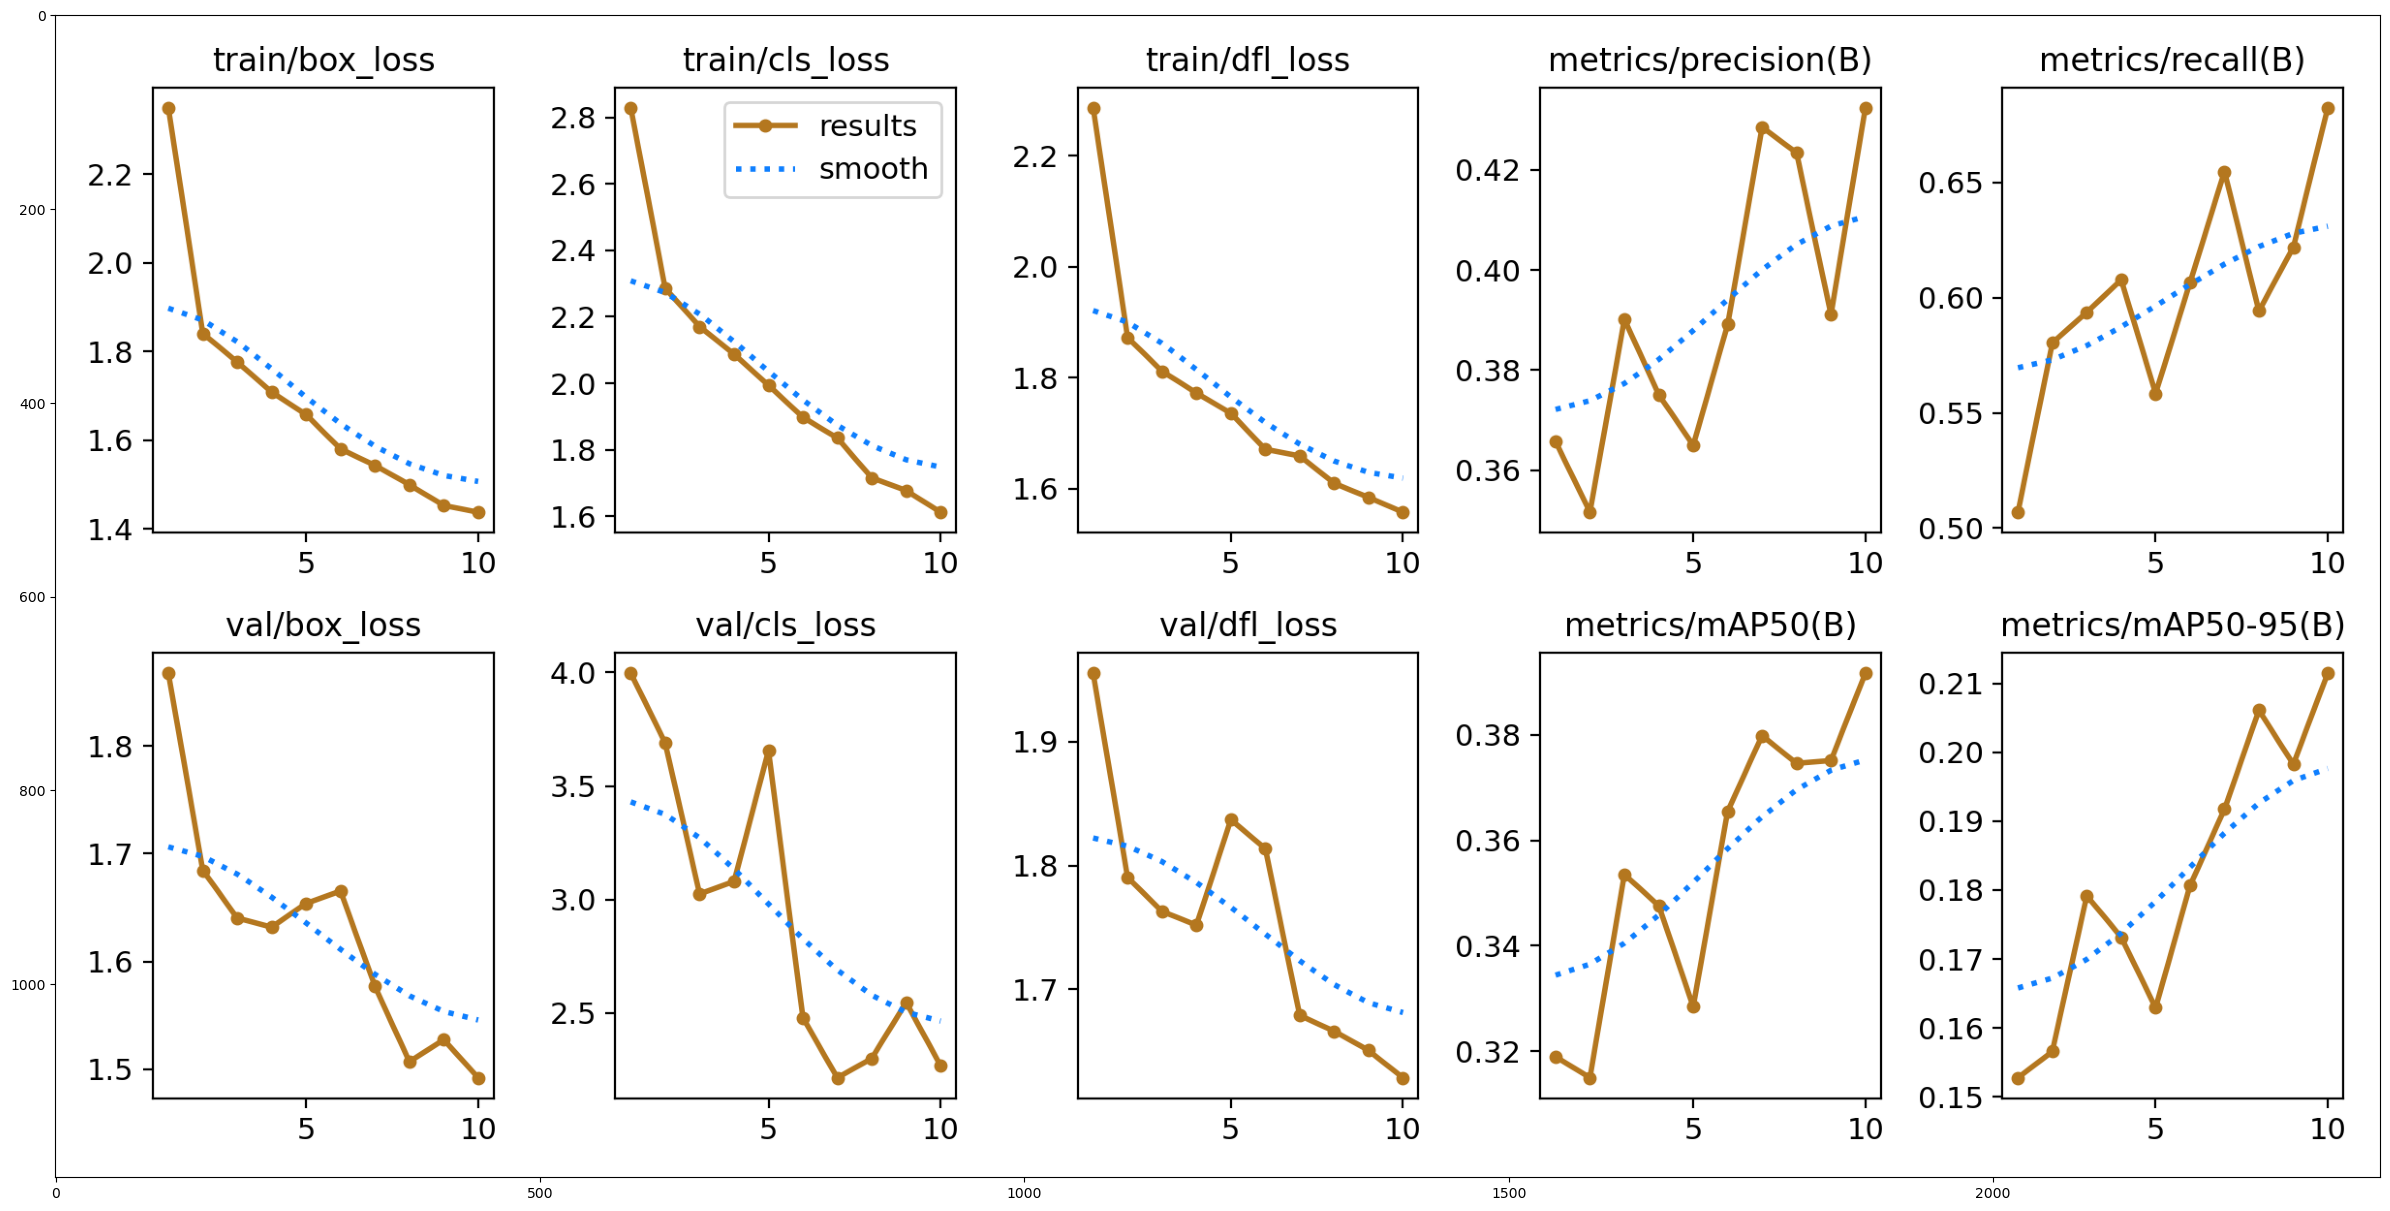

In [64]:
plt.figure(figsize=(30,30))
trainingresult_path=os.path.join(curr_path, 'runs', 'detect', 'train25')
results_png=cv2.imread(os.path.join(trainingresult_path,'results.png'))
plt.imshow(results_png)

In [65]:
# function for evaluating model metrics map50
def evaluate_map50(trainedmodel, data_path, dataset='val'):
    metrics=trainedmodel.val(data=data_path, split=dataset)
    map50=round(metrics.box.map50, 3)
    print("The mAP of model on {0} dataset is {1}".format(dataset,map50))
    return metrics, map50

In [66]:
# function for displaying plots created by YOLO
def display_curves(root_path):
    plt.figure(figsize=(50,50))

    #displaying p curve
    p_curve=cv2.imread(os.path.join(root_path,'P_curve.png'))
    ax=plt.subplot(5,1,1)
    plt.imshow(p_curve)

    #displaying r curve
    r_curve=cv2.imread(os.path.join(root_path,'R_curve.png'))
    ax=plt.subplot(5,1,2)
    plt.imshow(r_curve)

    #displaying pr curve
    pr_curve=cv2.imread(os.path.join(root_path,'PR_curve.png'))
    ax=plt.subplot(5,1,3)
    plt.imshow(pr_curve)

    #displaying f1 curve
    f1_curve=cv2.imread(os.path.join(root_path,'F1_curve.png'))
    ax=plt.subplot(5,1,4)
    plt.imshow(f1_curve)

    #displaying confusion matrix
    confusion_matrix=cv2.imread(os.path.join(root_path,'confusion_matrix.png'))
    ax=plt.subplot(5,1,5)
    plt.imshow(confusion_matrix)

### 3.3. Resultados datos de entrenamiento

In [67]:
# Evaluating train metrics
train_metrics, train_map50=evaluate_map50(model, config_path, dataset='train')

Ultralytics YOLOv8.0.219 🚀 Python-3.9.17 torch-2.0.1 CPU (AMD Ryzen 9 5900HS with Radeon Graphics)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\labels\tra
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [02:47


                   all       1573       2521      0.674      0.674      0.643      0.425
               Bicycle       1573        339      0.746      0.746      0.717      0.525
               Chimney       1573        586      0.643      0.845      0.731      0.516
                 Cross       1573       1256      0.645      0.204      0.356       0.16
                  Palm       1573        340      0.661        0.9      0.767      0.501
Speed: 1.9ms preprocess, 97.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\train252
The mAP of model on train dataset is 0.643


In [68]:
train_path=os.path.join(curr_path, 'runs', 'detect', 'train252')

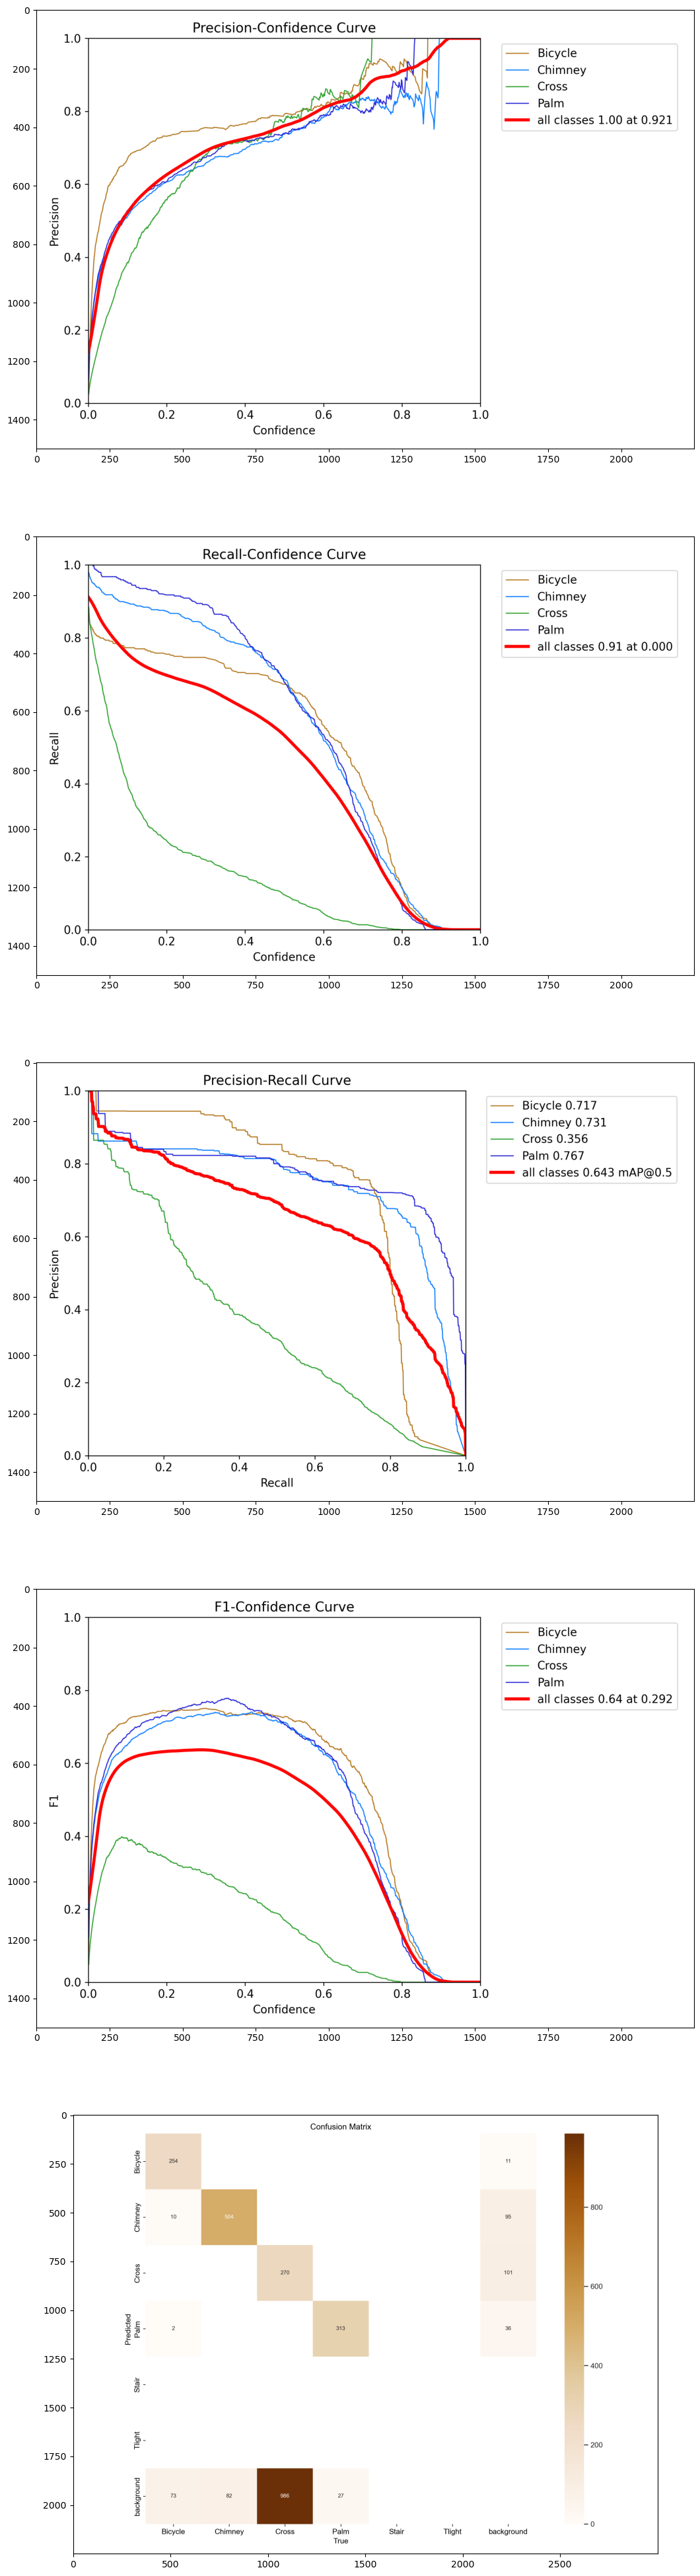

In [69]:
# Display plots on training data
display_curves(train_path)

### 3.4. Resultados datos de validacion

In [70]:
# Evaluating val metrics
val_metrics, val_map50=evaluate_map50(model, config_path, dataset='val')

Ultralytics YOLOv8.0.219 🚀 Python-3.9.17 torch-2.0.1 CPU (AMD Ryzen 9 5900HS with Radeon Graphics)


val: Scanning C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\labels\val
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:36


                   all        324        314      0.431      0.683      0.392      0.212
               Bicycle        324         44      0.441      0.864       0.44      0.242
               Chimney        324         88      0.402      0.795      0.453      0.278
                 Cross        324        133      0.412      0.158      0.196     0.0865
                  Palm        324         49      0.468      0.916      0.478       0.24
Speed: 2.0ms preprocess, 102.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\train253
The mAP of model on val dataset is 0.392


In [71]:
val_path=os.path.join(curr_path, 'runs', 'detect', 'train253')

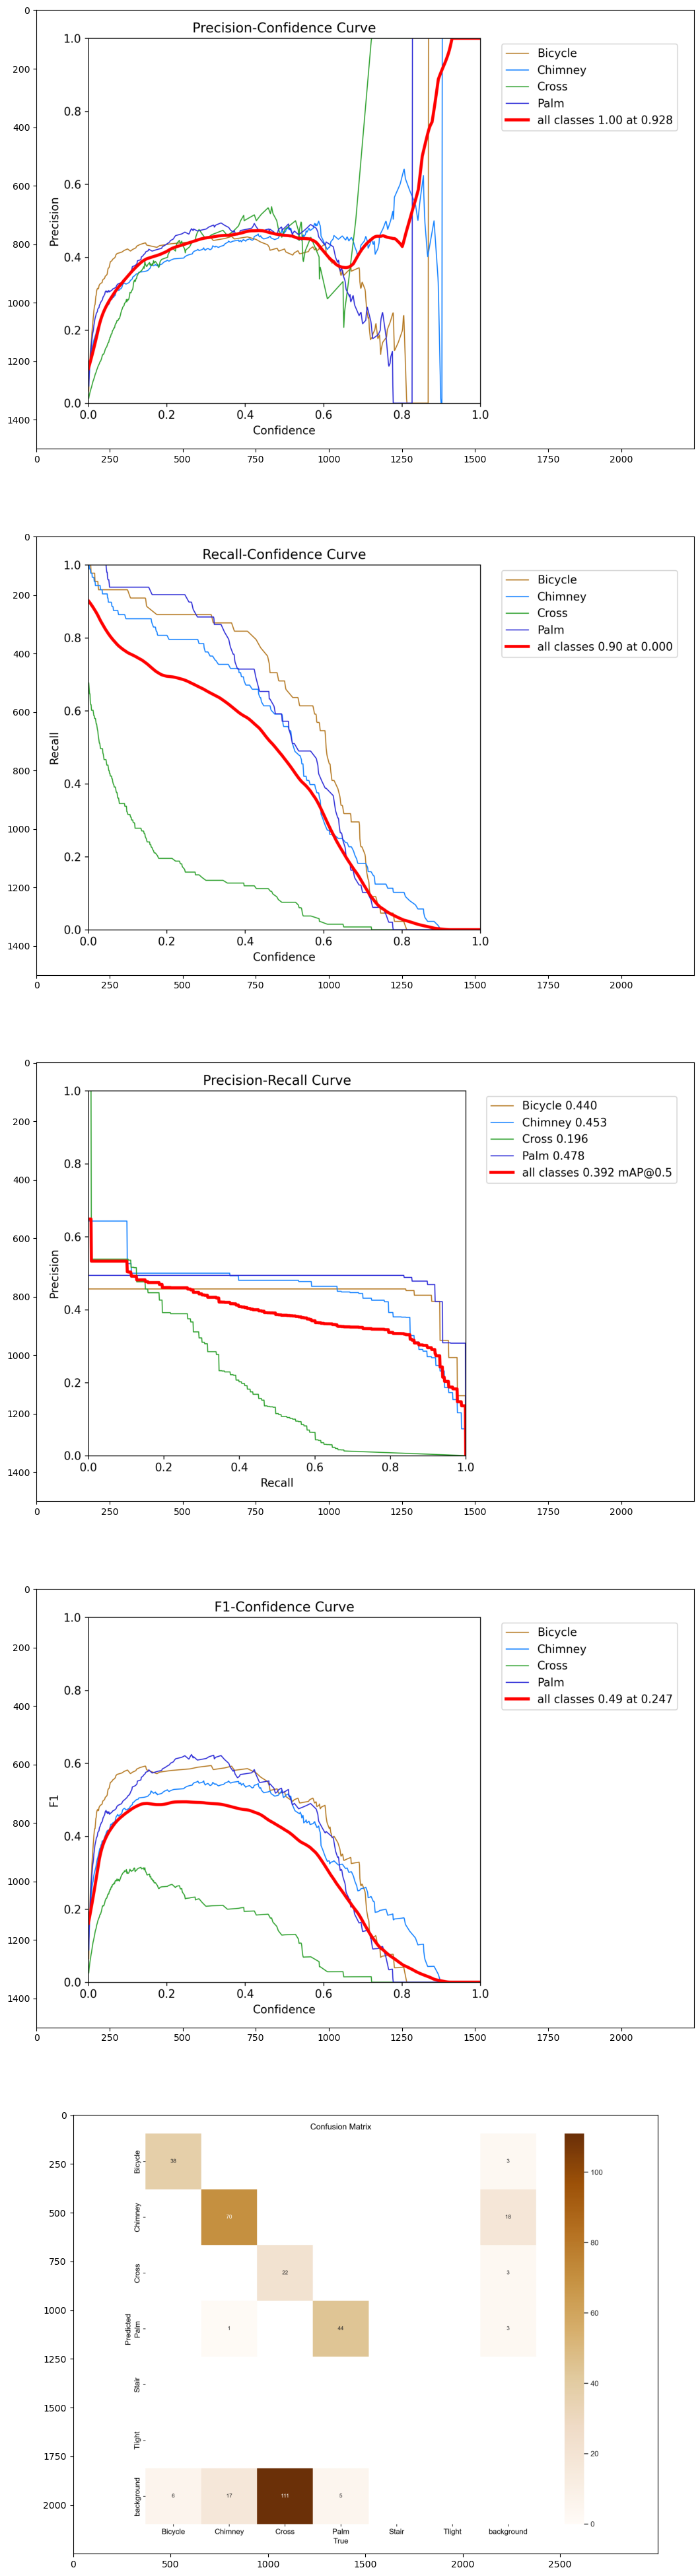

In [72]:
# Display plots on validation data
display_curves(val_path)

### 3.5. Resultados datos de test

In [73]:
# Evaluating test metrics
test_metrics, test_map50=evaluate_map50(model, config_path, dataset='test')

Ultralytics YOLOv8.0.219 🚀 Python-3.9.17 torch-2.0.1 CPU (AMD Ryzen 9 5900HS with Radeon Graphics)


val: Scanning C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\labels\tes
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [01:09


                   all        624        774      0.409      0.549      0.316      0.187
               Bicycle        624        119      0.479      0.564      0.344      0.218
               Chimney        624        153      0.415      0.739      0.409      0.259
                 Cross        624        407      0.319      0.106     0.0911     0.0431
                  Palm        624         95      0.422      0.789       0.42      0.227
Speed: 1.9ms preprocess, 101.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\train254
The mAP of model on test dataset is 0.316


In [74]:
test_path=os.path.join(curr_path, 'runs', 'detect', 'train254') #val3 is a misnomer, it is actually measuring validation on test dataset

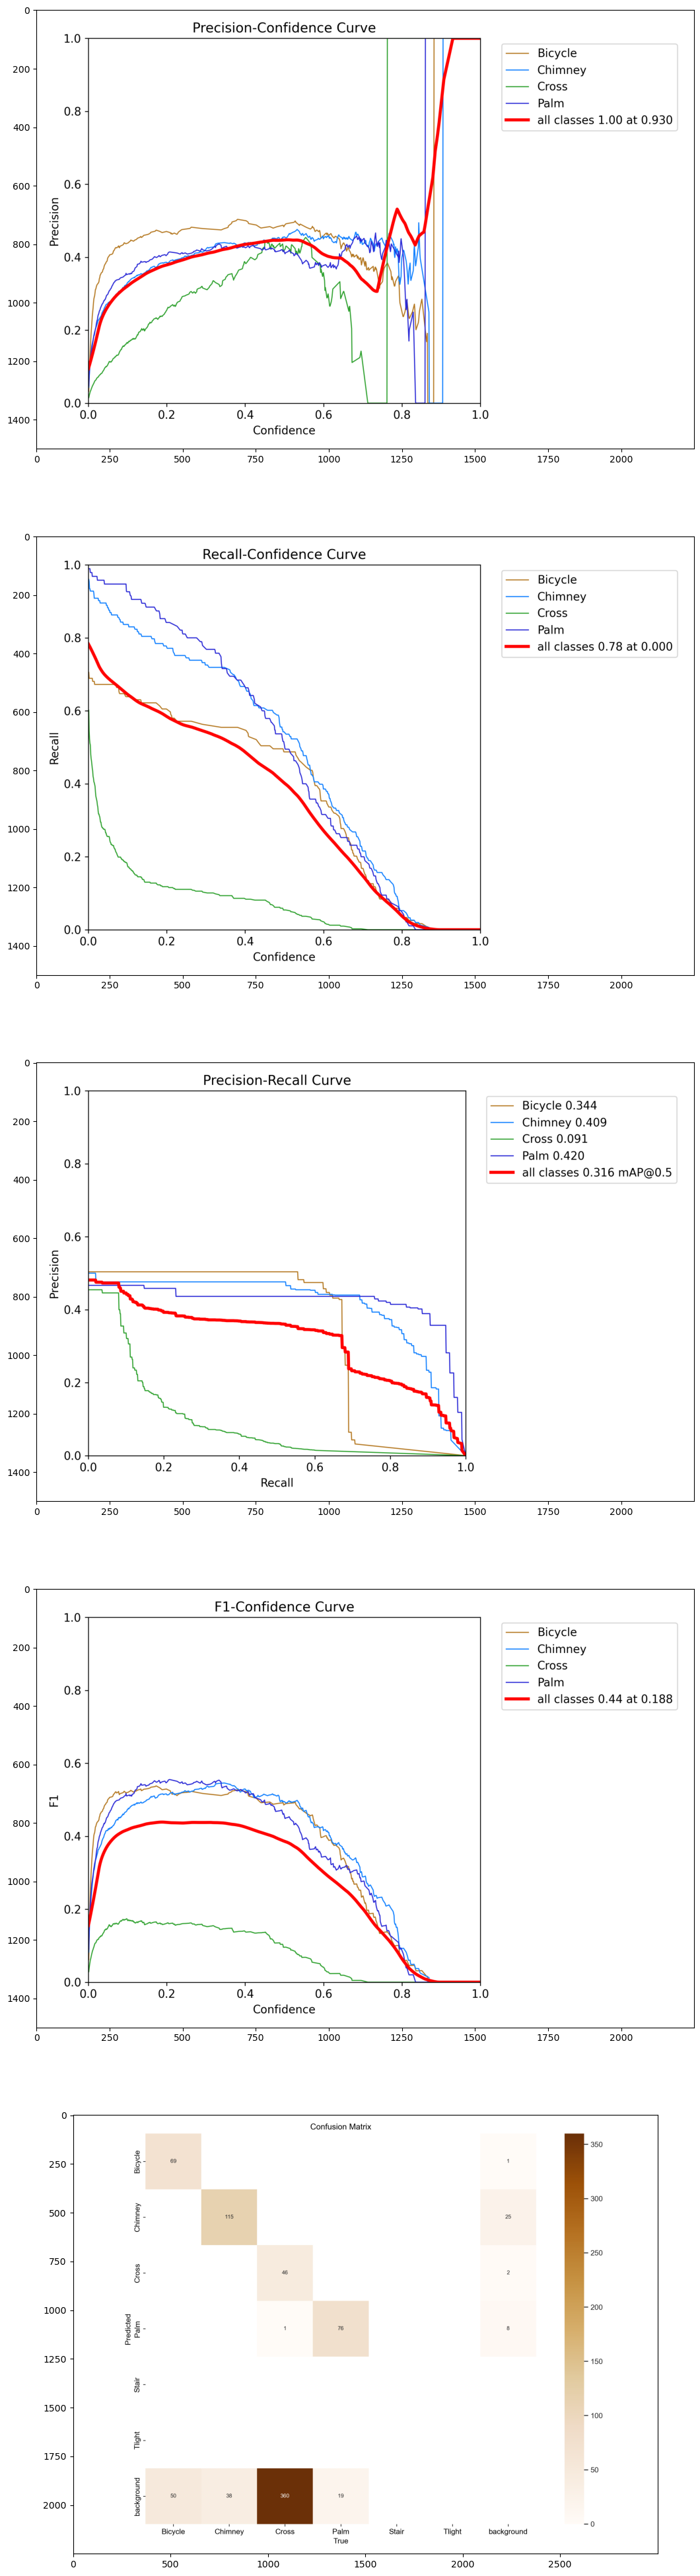

In [75]:
# Display plots on test data
display_curves(test_path)

## 4. Visualizacion de los resultados del modelo

## Load Model

In [5]:
# model.save('yolo_model')
from ultralytics import YOLO
import os
curr_path = os.getcwd()

In [52]:
model2 = YOLO(curr_path+'/runs/detect/train2/weights/best.pt')  # load a custom model


image 1/1 C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\images\train\Bicycle (443).png: 640x640 1 Bicycle, 92.0ms
Speed: 4.0ms preprocess, 92.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\images\train\Bicycle (2).png: 640x640 1 Bicycle, 90.0ms
Speed: 4.0ms preprocess, 90.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\images\train\Chimney (122).png: 640x640 2 Chimneys, 104.2ms
Speed: 4.0ms preprocess, 104.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\images\train\Bicycle (189).png: 640x640 1 Bicycle, 98.4ms
Speed: 3.0ms preprocess, 98.4ms inference, 1.0ms pos

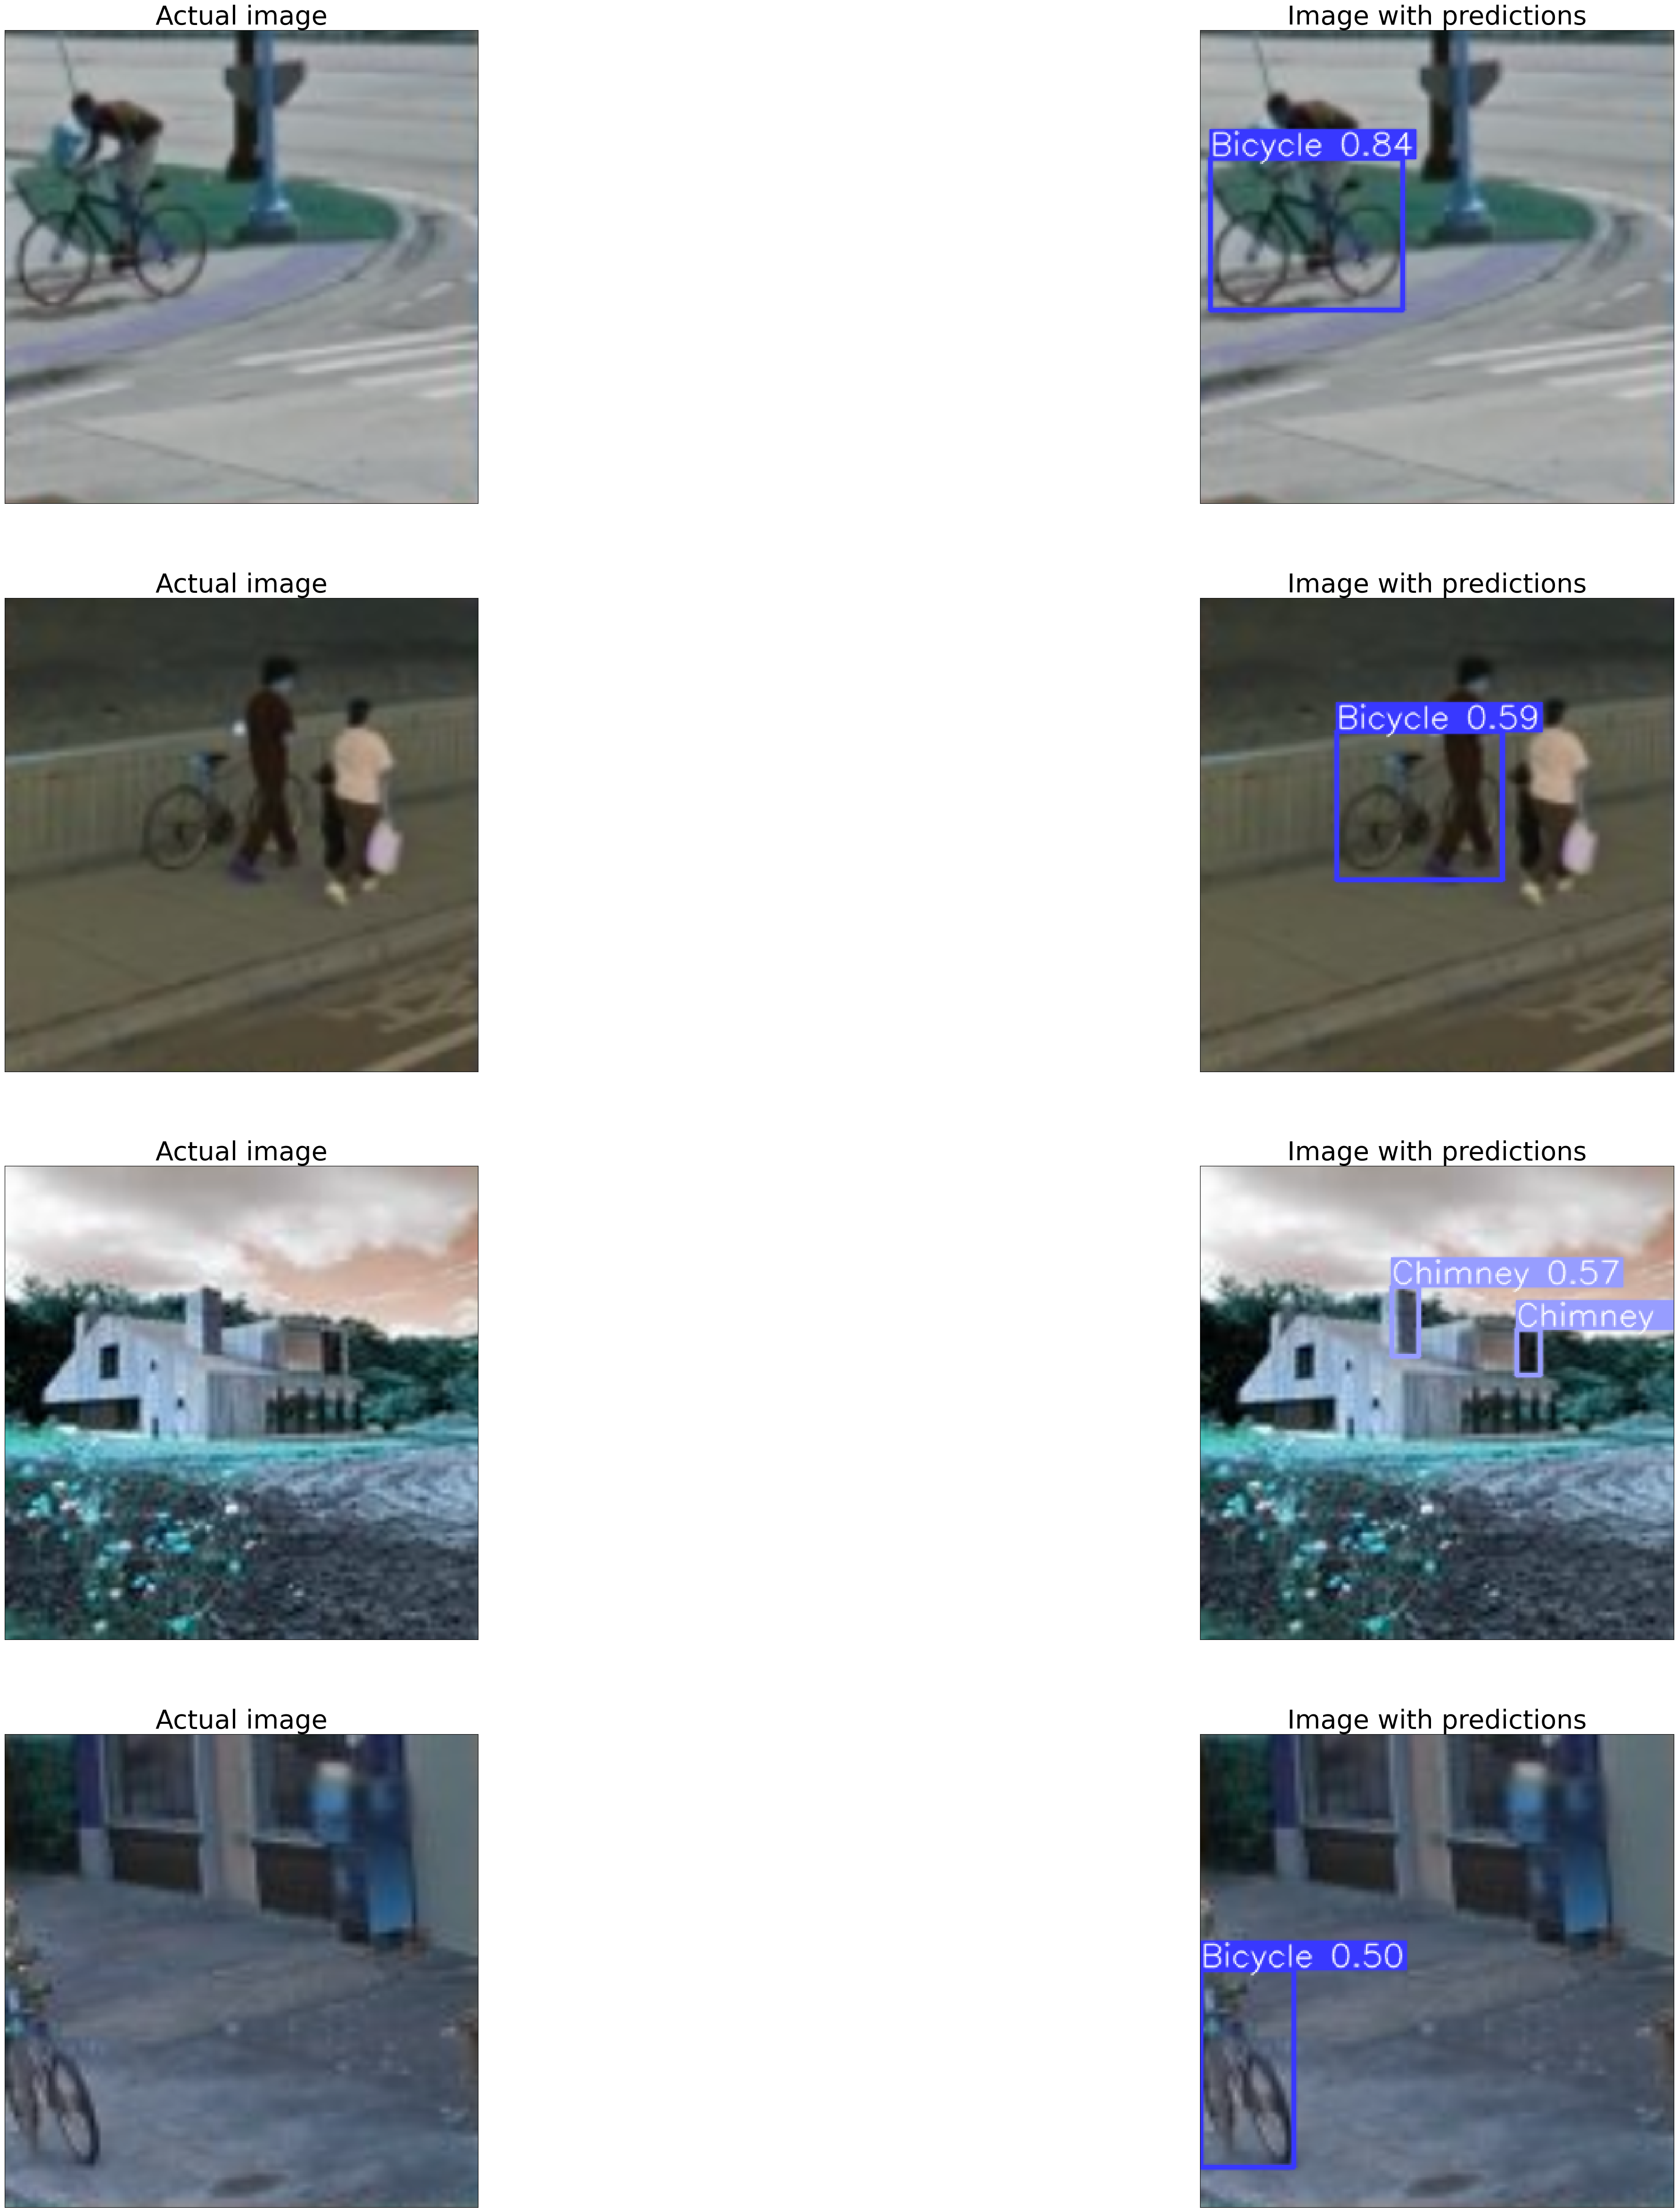

In [88]:
plt.figure(figsize=(60,60))
m=random.randint(0, 700) # Selecting random image number
for i in range(1,8,2):
    m=random.randint(0, 700)
    test_image=os.path.join(img_train_path, os.listdir(img_train_path)[m])
    ax=plt.subplot(4,2,i)

    # Display actual image
    plt.imshow(cv2.imread(test_image))
    plt.xticks([])
    plt.yticks([])
    plt.title("Actual image", fontsize = 40)

    # Predict
    res = model(test_image)
    res_plotted = res[0].plot()
    ax=plt.subplot(4,2,i+1)

    # Display image with predictions
    plt.imshow(res_plotted)
    plt.title("Image with predictions", fontsize = 40)
    plt.xticks([])
    plt.yticks([])
    # m=m+1

In [84]:
res = model2(test_image)
res


image 1/1 C:\Users\lrodr\OneDrive - Universidad de los Andes\laura\2023-2\deepLearning\proyecto\proyecto\images\train\Cross (352).png: 640x640 2 Palms, 122.0ms
Speed: 4.0ms preprocess, 122.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Bicycle', 1: 'Chimney', 2: 'Cross', 3: 'Palm', 4: 'Stair', 5: 'Tlight'}
 orig_img: array([[[118, 139, 140],
         [118, 139, 140],
         [122, 142, 144],
         ...,
         [129, 131, 147],
         [132, 132, 148],
         [132, 132, 148]],
 
        [[118, 139, 140],
         [118, 139, 140],
         [122, 142, 144],
         ...,
         [129, 131, 147],
         [132, 132, 148],
         [132, 132, 148]],
 
        [[126, 147, 148],
         [126, 147, 148],
         [130, 151, 153],
         ...,
         [132, 133, 149],
         [134, 134, 150],
         [134, 134, 150]],
 
        ...,
 
        [[116, 127, 125],
         [116, 127, 125],
         [115, 128, 126],
         ...,
         [ 96, 105, 113],
         [ 97, 106, 115],
         [ 97, 106, 115]],
 
        [[116, 127, 125],
         [116, 127, 125],
      